 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [397]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [398]:
# Reading whale returns
whale_returns_path = Path("C:/Users/khuli/Documents/BCS/20200720-Assignment3/Pandas-Assignment/whale_returns.csv")
whale_returns_data = pd.read_csv(whale_returns_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True )
whale_returns_data.sort_index(inplace=True)
whale_returns_data.head(10)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [399]:
whale_returns_data.columns = ['Soros','Paulson','Tiger','Berkshire']
whale_returns_data.head(10)

,Soros,Paulson,Tiger,Berkshire
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739
2015-03-11,0.004012,0.005163,0.003312,-0.001147
2015-03-12,0.008265,0.010272,0.013117,0.010801


In [400]:
#take a look into the raw data
whale_returns_data.shape 

(1060, 4)

In [401]:
whale_returns_data.count()

Soros        1059
Paulson      1059
Tiger        1059
Berkshire    1059
dtype: int64

In [402]:
# Count nulls
a = whale_returns_data.isnull().mean()*100
print(a)

Soros        0.09434
Paulson      0.09434
Tiger        0.09434
Berkshire    0.09434
dtype: float64


In [403]:
# Drop nulls
whale_returns_data = whale_returns_data.dropna()

In [404]:
# Recheck Count nulls
a = whale_returns_data.isnull().mean()*100
print(a)

Soros        0.0
Paulson      0.0
Tiger        0.0
Berkshire    0.0
dtype: float64


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [405]:
# Reading algorithmic returns
algo_returns_path = Path("C:/Users/khuli/Documents/BCS/20200720-Assignment3/Pandas-Assignment/algo_returns.csv")
algo_returns_data = pd.read_csv(algo_returns_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
algo_returns_data.sort_index(inplace =True)
algo_returns_data.head(10)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
2014-06-04,-0.001838,NaN
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668


In [406]:
algo_returns_data.shape
algo_returns_data.count()

Algo 1    1241
Algo 2    1235
dtype: int64

In [407]:
# Count nulls
a = algo_returns_data.isnull().mean()*100
print(a)

Algo 1    0.000000
Algo 2    0.483481
dtype: float64


In [408]:
# Drop nulls
algo_returns_data = algo_returns_data.dropna()
a = algo_returns_data.isnull().mean()*100
print(a)

Algo 1    0.0
Algo 2    0.0
dtype: float64


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [409]:
# Reading S&P 500 Closing Prices
sp500_history_path = Path("C:/Users/khuli/Documents/BCS/20200720-Assignment3/Pandas-Assignment/sp500_history.csv")
sp500_history_data = pd.read_csv(sp500_history_path, index_col = 'Date', parse_dates = True, infer_datetime_format = True)
sp500_history_data.sort_index(inplace = True)
sp500_history_data.head(10)

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
2012-10-08,$1455.88
2012-10-09,$1441.48
2012-10-10,$1432.56
2012-10-11,$1432.84


In [410]:
# Check Data Types
sp500_history_data.dtypes

Close    object
dtype: object

In [411]:
# Fix Data Types
sp500_history_data['Close'] = sp500_history_data['Close'].str.replace('$','')
sp500_history_data.head(10)
sp500_history_data['Close'] = sp500_history_data['Close'].astype(float)
sp500_history_data.dtypes

Close    float64
dtype: object

In [412]:
sp500_history_data.head(10)

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93
2012-10-08,1455.88
2012-10-09,1441.48
2012-10-10,1432.56
2012-10-11,1432.84


In [413]:
# Calculate Daily Returns
sp500_returns_data = sp500_history_data.pct_change()
sp500_returns_data.head(10)

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195


In [414]:
# Drop nulls
sp500_returns_data = sp500_returns_data.dropna()
a = sp500_returns_data.isnull().mean()*100
print(a)

Close    0.0
dtype: float64


In [415]:
# Rename Column
sp500_returns_data.columns = ['SP500']
sp500_returns_data.head(10)

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
2012-10-09,-0.009891
2012-10-10,-0.006188
2012-10-11,0.000195
2012-10-12,-0.002966


## Combine Whale, Algorithmic, and S&P 500 Returns

In [416]:
# Concatenate all DataFrames into a single DataFrame
fund_returns_df = pd.concat([whale_returns_data, algo_returns_data, sp500_returns_data], axis = 'columns', join = 'inner' )
fund_returns_df = fund_returns_df.dropna()
fund_returns_df.head(-10)

,Soros,Paulson,Tiger,Berkshire,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-02,0.000193,-0.005619,-0.006623,0.001152,0.003776,-0.000413,0.000017
2019-04-03,0.003562,0.001305,0.005193,0.003252,-0.003337,0.000287,0.002148
2019-04-04,0.001255,0.010630,0.008459,-0.008037,-0.003597,0.003265,0.002085


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

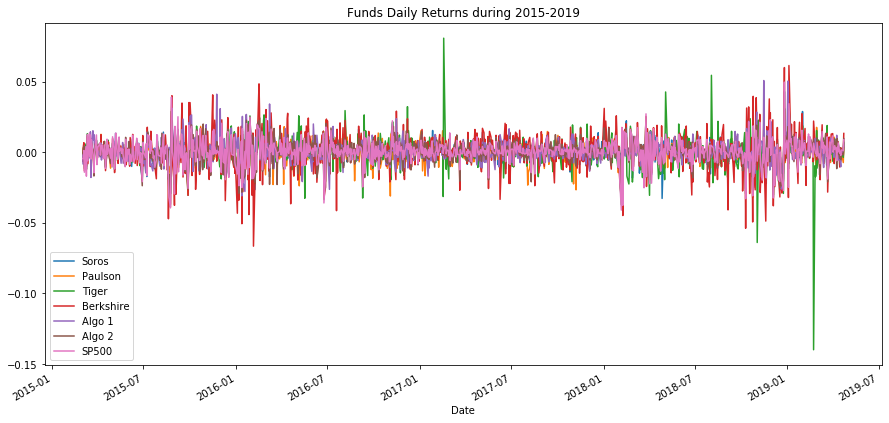

In [417]:
# Plot daily returns
fund_returns_df.plot(figsize=(15,7), title ="Funds Daily Returns during 2015-2019")

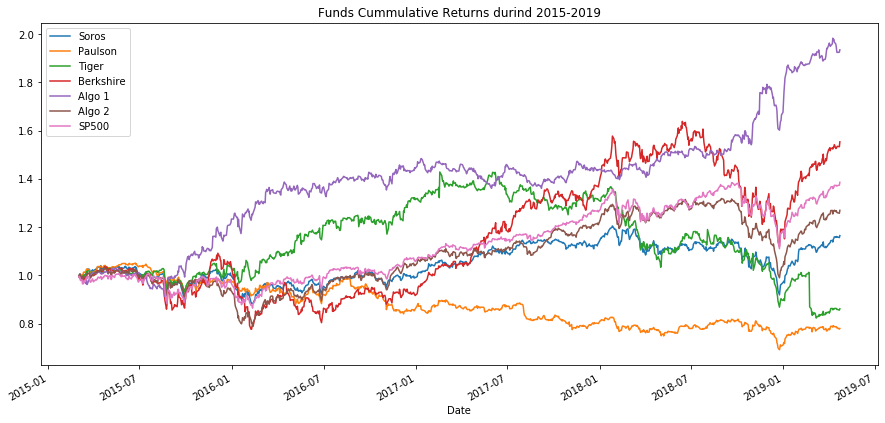

In [418]:
# Plot cumulative returns
fund_returns_cum = (1+ fund_returns_df).cumprod()
fund_returns_cum.plot(figsize = (15,7), title = 'Funds Cummulative Returns durind 2015-2019')

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

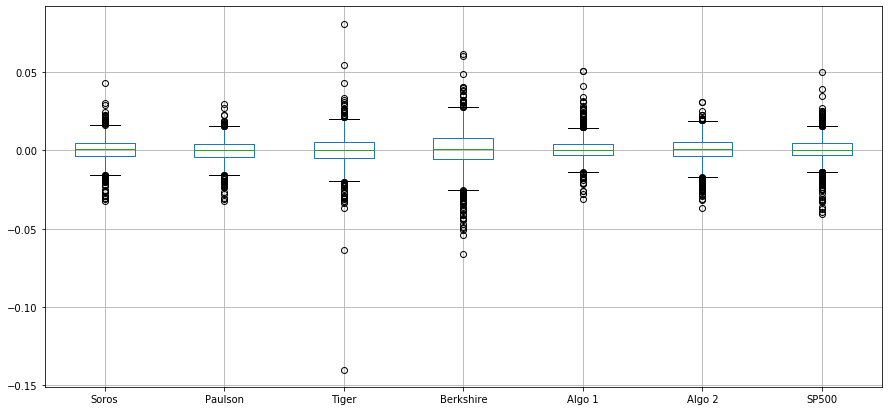

In [419]:
# Box plot to visually show risk
boxplot = fund_returns_df.boxplot(figsize=(15,7), grid = True)

In [420]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
fund_returns_std = fund_returns_df.std()
fund_returns_std
# Which portfolios are riskier than the S&P 500?

Soros        0.007895
Paulson      0.007023
Tiger        0.010894
Berkshire    0.012919
Algo 1       0.007620
Algo 2       0.008342
SP500        0.008554
dtype: float64

In [421]:
morerisk = []
lessrisk = []
a = fund_returns_std['SP500']
for key, value in fund_returns_std.items():
    if value > a:
        morerisk.append(key)
    elif value == a:
        lessrisk.append(key)
    elif value < a:
        lessrisk.append(key)
print(morerisk)
print(lessrisk)

['Tiger', 'Berkshire']
['Soros', 'Paulson', 'Algo 1', 'Algo 2', 'SP500']


In [422]:
# Determine which portfolios are riskier than the S&P 500
print(f"{morerisk[0]} and {morerisk[1]} have higher standard deviation than SP500")

Tiger and Berkshire have higher standard deviation than SP500


In [423]:
# Calculate the annualized standard deviation (252 trading days)
fund_returns_std_yearly = fund_returns_std*np.sqrt(252)
fund_returns_std_yearly

Soros        0.125335
Paulson      0.111488
Tiger        0.172936
Berkshire    0.205077
Algo 1       0.120967
Algo 2       0.132430
SP500        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

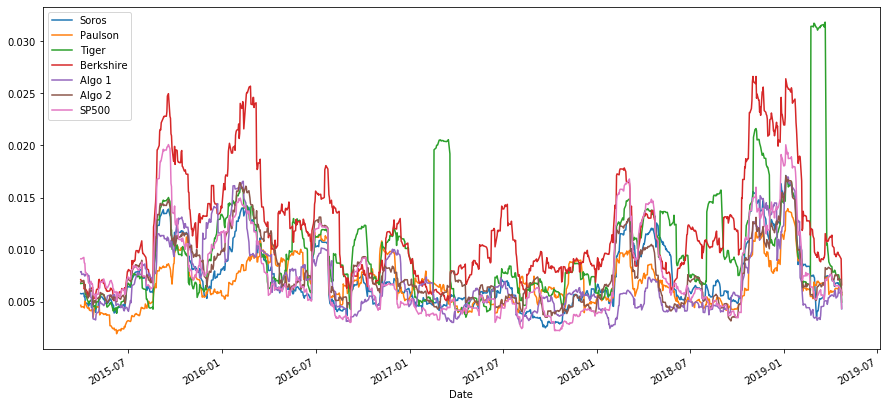

In [424]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
fund_returns_std_roll = fund_returns_df.rolling(window=21).std()
fund_returns_std_roll.plot(figsize = (15,7))

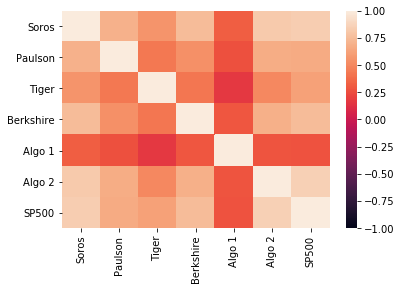

In [446]:
# Construct a correlation table
correlation = fund_returns_df.corr()
sns.heatmap(correlation, vmin=1, vmax=-1)

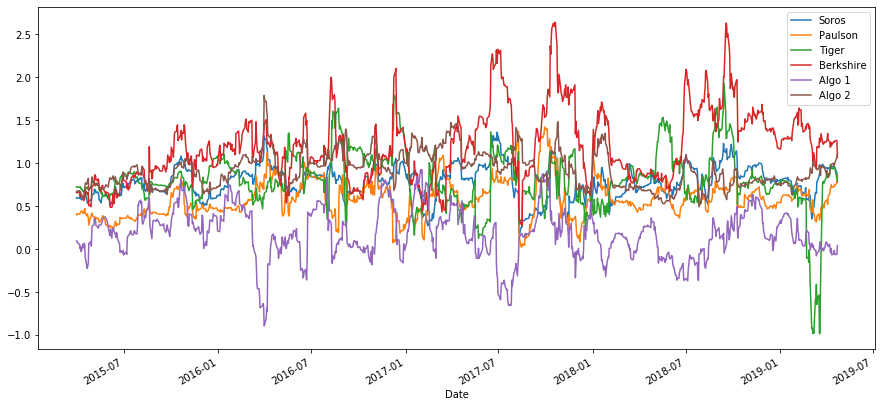

In [461]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
sp500_var_roll = fund_returns_df['SP500'].rolling(window=21).var()
fund_returns_cov = fund_returns_df.rolling(window=21).cov(fund_returns_df['SP500'])
soros_sp500_beta = fund_returns_cov['Soros']/sp500_var_roll
paulson_sp500_beta = fund_returns_cov['Paulson']/sp500_var_roll
tiger_sp500_beta = fund_returns_cov['Tiger']/sp500_var_roll
berkshire_sp500_beta = fund_returns_cov['Berkshire']/sp500_var_roll
algo1_sp500_beta = fund_returns_cov['Algo 1']/sp500_var_roll
algo2_sp500_beta = fund_returns_cov['Algo 2']/sp500_var_roll
ax = soros_sp500_beta.plot(figsize=(15,7))
paulson_sp500_beta.plot(ax=ax)
tiger_sp500_beta.plot(ax=ax)
berkshire_sp500_beta.plot(ax=ax)
algo1_sp500_beta.plot(ax=ax)
algo2_sp500_beta.plot(ax=ax)
ax.legend(['Soros','Paulson','Tiger','Berkshire','Algo 1','Algo 2'])

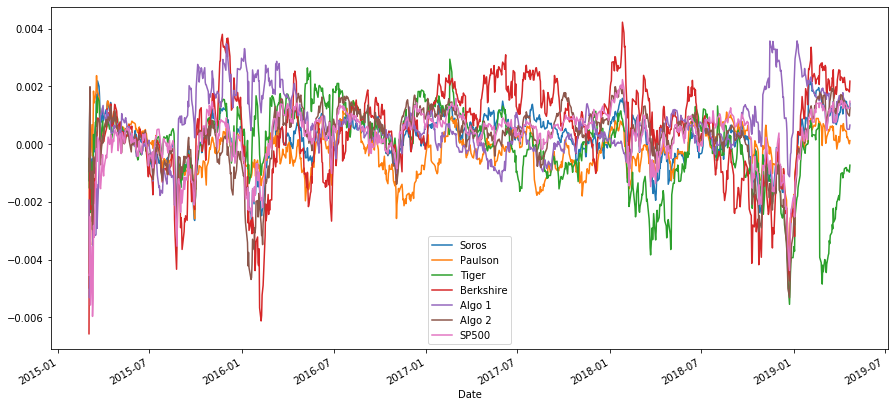

In [468]:
# Calculate a rolling window using the exponentially weighted moving average. 
fund_retuns_ewm = fund_returns_df.ewm(halflife=21).mean()
fund_retuns_ewm.plot(figsize=(15,7))

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [471]:
# Calculate annualized Sharpe Ratios
fund_returns_sharpe = (fund_returns_df.mean()*252)/(fund_returns_df.std() * np.sqrt(252))
fund_returns_sharpe

Soros        0.356417
Paulson     -0.483570
Tiger       -0.121060
Berkshire    0.621810
Algo 1       1.378648
Algo 2       0.501364
SP500        0.648267
dtype: float64

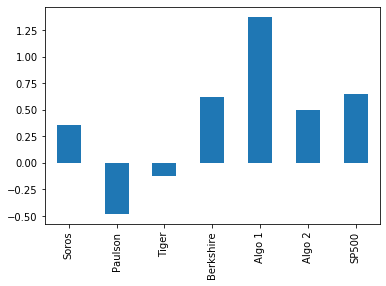

In [472]:
# Visualize the sharpe ratios as a bar plot
fund_returns_sharpe.plot(kind='bar')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [430]:
# Read the first stock
# YOUR CODE HERE

In [431]:
# Read the second stock
# YOUR CODE HERE

In [432]:
# Read the third stock
# YOUR CODE HERE

In [433]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [434]:
# Reset the index
# YOUR CODE HERE

In [435]:
# Pivot so that each column of prices represents a unique symbol
# YOUR CODE HERE

In [436]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [437]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [438]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
# YOUR CODE HERE

In [439]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [440]:
# Risk
# YOUR CODE HERE

In [441]:
# Rolling
# YOUR CODE HERE

In [442]:
# Annualized Sharpe Ratios
# YOUR CODE HERE

In [443]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

In [444]:
# Create a correlation analysis
# YOUR CODE HERE

In [445]:
# Beta
# YOUR CODE HERE